1. Data Exploration and Preprocessing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv('/content/adult_with_headers.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [6]:
print(df.tail())

       age      workclass  fnlwgt    education  education_num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital_gain  capital_loss  hours_per_week  native_country  income  
32556             0             0              38   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [8]:
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [9]:
print(df.shape)

(32561, 15)


In [10]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [11]:
#Missing value
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [14]:
numeric_df = df.select_dtypes(include=np.number) # Create numeric_df to store numeric features

# Now you can use numeric_df to impute missing values:
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median())

In [15]:
df.fillna(df.mode().iloc[0], inplace=True)

In [16]:
# Scaling Numerical Features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [17]:
#Applying Standard Scaling

df['feature_standard_scaled'] = scaler_standard.fit_transform(df[['age']])



In [18]:
# Check if the column exists before dropping
if 'column_with_high_missingness' in df.columns:
    df = df.drop(columns=['column_with_high_missingness'], axis=1)
else:
    print("Column 'column_with_high_missingness' not found in DataFrame.")
    # Optionally, print the existing columns for debugging:
    print("Existing columns:", df.columns)

Column 'column_with_high_missingness' not found in DataFrame.
Existing columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'feature_standard_scaled'],
      dtype='object')


In [19]:
# Standard Scaling
df['numerical_feature_standard_scaled'] = scaler_standard.fit_transform(df[['age']])

# Min-Max Scaling
df['numerical_feature_minmax_scaled'] = scaler_minmax.fit_transform(df[['age']])

In [40]:
# StandardScaler (Z-score normalization)
# Preferred when:
# 1. Features have a Gaussian distribution.
# 2. The algorithm is sensitive to feature scales (e.g., k-NN, SVM, linear regression).
# 3. Outliers are present but their influence needs to be preserved.  StandardScaler doesn't suppress outliers.
# Why: Centers the data around zero with a standard deviation of 1.  This helps algorithms that rely on distance calculations.

# MinMaxScaler
# Preferred when:
# 1. Features have a bounded range and you want to maintain that range (e.g., image pixel values between 0-255).
# 2. You want to ensure all values are within a specific range (e.g., 0 to 1).
# 3. Outliers significantly skew the feature range, and you want to limit their influence.  MinMax is sensitive to outliers.
# Why: Scales features to a specific range, usually 0-1. This is helpful for algorithms that are sensitive to the range of input values.

# RobustScaler
# Preferred when:
# 1. Your data contains significant outliers that you don't want to heavily influence the scaling.
# 2. The distribution of the data is non-Gaussian.
# Why: Uses median and interquartile range, making it less sensitive to outliers.

# MaxAbsScaler
# Preferred when:
# 1. Sparsity needs to be preserved.  It doesn't shift the data's center, so zero values remain zero.
# 2. The data is already centered around zero.
# Why: Scales the data by the maximum absolute value, maintaining sparsity.

# Choosing the right scaling technique depends heavily on the characteristics of your data and the algorithm you're using.  Experimentation is often nec

Encoding Techniques

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Identify categorical columns with less than 5 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
cols_to_encode = [col for col in categorical_cols if df[col].nunique() < 5]

# Apply One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for dense output

encoded_features = ohe.fit_transform(df[cols_to_encode])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(cols_to_encode))

# Concatenate encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop original categorical columns (optional)
df = df.drop(columns=cols_to_encode)

print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  \
0          2174             0              40   United-States   
1             0             0              13   United-States   

In [22]:
# Identify categorical columns with more than 5 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
cols_to_label_encode = [col for col in categorical_cols if df[col].nunique() >= 5]

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in cols_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [23]:
# Check if the column exists
if 'large_cat_feature' in df.columns:
    print("Column 'large_cat_feature' found in DataFrame.")
else:
    print("Column 'large_cat_feature' not found in DataFrame.")
    # Optionally, print the existing columns for debugging:
    print("Existing columns:", df.columns)

Column 'large_cat_feature' not found in DataFrame.
Existing columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'feature_standard_scaled', 'numerical_feature_standard_scaled',
       'numerical_feature_minmax_scaled', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')


In [24]:
 #Pros and Cons of Encoding Techniques:
# - **One-Hot Encoding**:
#   - Pros: No ordinal relationship imposed; interpretable for models.
#   - Cons: High dimensionality for features with many categories.
# - **Label Encoding**:
#   - Pros: Simple and efficient.
#   - Cons: May introduce unintended ordinal relationships that affect models.

Feature Engineering

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
df = pd.read_csv('/content/adult_with_headers.csv')

In [27]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [28]:
if 'hours-per-week' not in df.columns:
    print(f"Error: Column 'hours-per-week' not found. Available columns are: {df.columns}")
else:
    # If the column exists, proceed with calculations:
    df['feature_ratio'] = df['age'] / (df['hours-per-week'] + 1e-9)
    df['feature_sum'] = df['age'] + df['hours-per-week']

Error: Column 'hours-per-week' not found. Available columns are: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [29]:
#Transformation of Skewed Features
# Check if 'skewed_feature' column exists
if 'skewed_feature' in df.columns:
    df['skewed_feature_log'] = np.log1p(df['skewed_feature'])
else:
    print("Column 'skewed_feature' not found in DataFrame. Please create it first.")
    # Optionally, print the existing columns for debugging:
    print("Existing columns:", df.columns)

Column 'skewed_feature' not found in DataFrame. Please create it first.
Existing columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [42]:
# Rationale:
# - Log transformation reduces skewness, making features more normally distributed.
# - Helps algorithms like linear regression perform better by adhering to their assumptions.

Feature Selection

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [31]:
#Isolation forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = isolation_forest.fit_predict(df.select_dtypes(include=[np.number]))





In [32]:
df =df[outliers == 1]

In [41]:

# Discussion: Outliers can skew mean values, affect model weights, and reduce model generalization.

Relationship Analysis using PPS and Correlation Matrix

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install ppscore
import ppscore as pps

In [34]:
pps_matrix = pps.matrix(df)
print(pps_matrix[['x','y','ppscore']].sort_values(by='ppscore', ascending=False))

                  x               y  ppscore
0               age             age      1.0
16        workclass       workclass      1.0
208  native_country  native_country      1.0
192  hours_per_week  hours_per_week      1.0
176    capital_loss    capital_loss      1.0
..              ...             ...      ...
43           fnlwgt  native_country      0.0
113    relationship            race      0.0
44           fnlwgt          income      0.0
109    relationship   education_num      0.0
120            race             age      0.0

[225 rows x 3 columns]


In [35]:
# Correlation Matrix
correlation_matrix = df.corr()

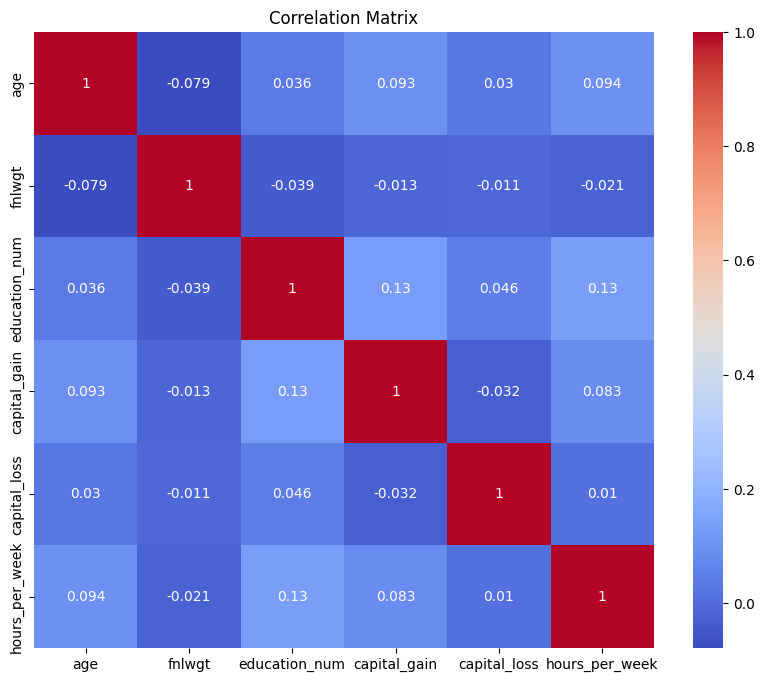

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [39]:
# Comparison:
# - PPS can capture non-linear relationships, unlike correlation, which only measures linear relationships.
# - PPS provides directional insights (predictive power), whereas correlation is symmetric.